# Auto reload modules

In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import scripts.missing as missing
import pandas as pd
import numpy as np
import fs

In [18]:
MAIN_DIR = fs.open_fs("../../data/raw/project")
CSV_DIR = MAIN_DIR.getsyspath("car_dataframe.csv")

ITNERIM_DIR = fs.open_fs("../../data/raw/project")
CARS_CLEAN_CSV_DIR = ITNERIM_DIR.getsyspath("car_dataframe.csv")

df = pd.read_csv(CSV_DIR)

In [3]:
df

,fuel_consumption_km_l,traccion,transmision,horsepower,fuel_type,displacement,gears,engine_type,torque,turbo,brand,age
0,7,4x2,Automático,449,estándar,3.0,7,Combustión,516,Sí,Mercedes Benz,9
1,10,4x4,Automático,310,estándar,3.0,8,Combustión,325,Sí,Audi,7
2,11,4x4,Automático,300,estándar,2.0,8,Combustión,295,Sí,Jaguar Xe,6
3,17,4x2,Automático,150,estándar,1.4,7,Combustión,148,Sí,Seat,6
4,12,4x4,Automático,320,Gasolina,2.0,8,Combustión,295,Sí,Volvo,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1872,14,4x2,Manual,100,Gasolina,1.6,5,Combustión,105,No,Volkswagen,9
1873,14,4x2,Manual,105,estándar,1.6,5,Combustión,107,No,Renault,7
1874,15,4x2,Manual,115,NoInfo,NaN,0,NoInfo,114,No,Chevrolet,8
1875,9,4x4,Automático,285,estándar,NaN,0,NoInfo,300,No,Lincoln,9


In [21]:
(
    df
    .select_dtypes(object)
    .apply(pd.unique)
)

traccion                                              [4x2, 4x4]
transmision                                 [Automático, Manual]
fuel_type      [estándar, Gasolina, Híbrido, Eléctrico, Diese...
engine_type    [Combustión, Eléctrico, Híbrido, Mild Hybrid, ...
turbo                                                   [Sí, No]
brand          [Mercedes Benz, Audi, Jaguar Xe, Seat, Volvo, ...
dtype: object

In [24]:
df['fuel_type'].unique()

array(['estándar', 'Gasolina', 'Híbrido', 'Eléctrico', 'Diesel', 'NoInfo'],
      dtype=object)

In [25]:
df['engine_type'].unique()

array(['Combustión', 'Eléctrico', 'Híbrido', 'Mild Hybrid', 'NoInfo',
       'Motor Supercargado'], dtype=object)

In [26]:
df = (
    df
    .replace(
        to_replace=[0,'NoInfo'],
        value=np.nan
    )
        .replace(
        to_replace=['estándar'],
        value='Estándar'
    )
)

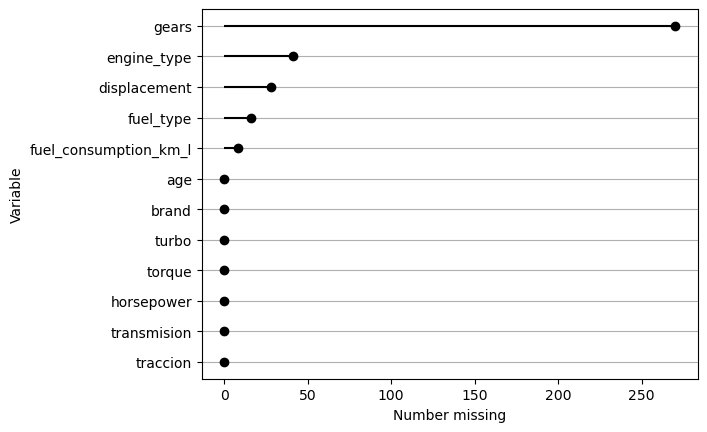

In [29]:
df.missing.missing_variable_plot()

In [4]:
# df.to_csv(CARS_CLEAN_CSV_DIR, encoding='utf-8', index=False)